### Like K-means samples, we are going to do 2 different practices
In this practice we will do a hierarchical clustering using the **make_blobs()** function to generate random samples.

In both examples, we will be using the **Agglomerative** method, which is a **bottom-up** technique for hierarchical clustering.

#### Load initial pachakges

In [1]:
import numpy as np 
import pandas as pd
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs

### Generate Randome samples using *make_blobs()*

(50, 2) (50,)


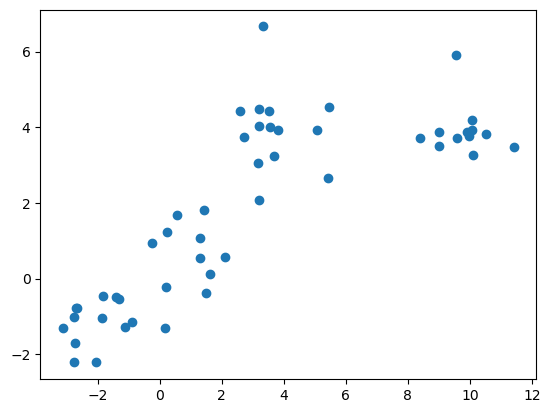

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

print (X1.shape, y1.shape)

# plot the data
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

### Agglomerative Clustering

The linkage criterion determines which distance to use between sets of observations. The algorithm will merge the pairs of clusters that minimize this criterion

*Note: There are other options for <b>linkage</b>:*
* <b>Single</b>: uses the <b>minimum</b> of the distances between all observations of the two sets
* <b>Complete</b>: uses the <b>maximum</b> of the distances between all observations of the two sets
* <b>Average</b>: uses the <b>average</b> of the distances of each observation of the two sets
* <b>Ward</b>: <b>minimizes the variance</b> of the clusters being merged


In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

# Now fit the algorithm to the dataset
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

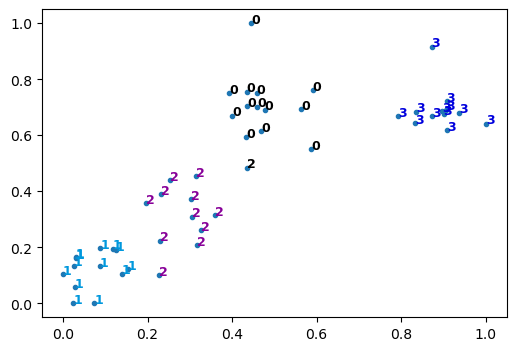

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Normalize the all data for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color-coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10),
             fontdict={'weight': 'bold', 'size': 9})


# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

### Plot the Dendogram regarding to the Agglomeratinve clustering

In [7]:
dist_matrix = distance_matrix(X1,X1) 
print (dist_matrix.shape)
print(dist_matrix)

(50, 50)
[[0.         0.12004354 0.71626793 ... 0.36113898 0.83000018 1.06772086]
 [0.12004354 0.         0.62279274 ... 0.24464526 0.72503782 0.9508005 ]
 [0.71626793 0.62279274 0.         ... 0.41464939 0.16401612 0.49925229]
 ...
 [0.36113898 0.24464526 0.41464939 ... 0.         0.49157658 0.70664941]
 [0.83000018 0.72503782 0.16401612 ... 0.49157658 0.         0.33729923]
 [1.06772086 0.9508005  0.49925229 ... 0.70664941 0.33729923 0.        ]]


C:\Users\ramin\AppData\Local\Temp\ipykernel_11192\850864696.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


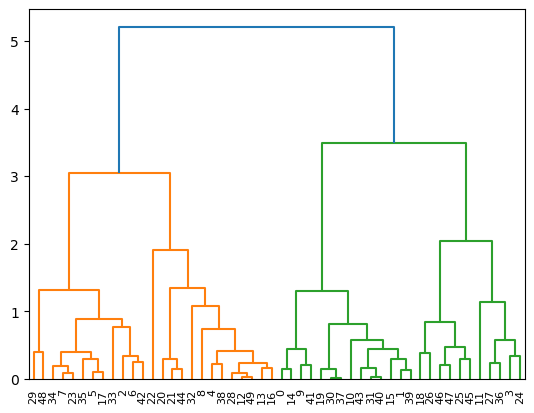

In [8]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)